
--- Bölgesel Kotalar ---
AYEDAŞ: 30 araç (garantili)
BAŞKENT: 39 araç (orantılı)
TOROSLAR: 51 araç (orantılı)

--- Dönüşüm İçin En Yüksek Önceliğe Sahip İlk 120 Aracın Dağılımı ---
Planlama_UY
TOROSLAR    51
BAŞKENT     39
AYEDAŞ      30
Name: count, dtype: int64

AYEDAŞ Oranı: 25.00%

✅ Dönüşüm için 120 araçlık liste oluşturuldu ve 'elektrikli_arac_donusum_listesi_120_arac.csv' dosyasına kaydedildi.


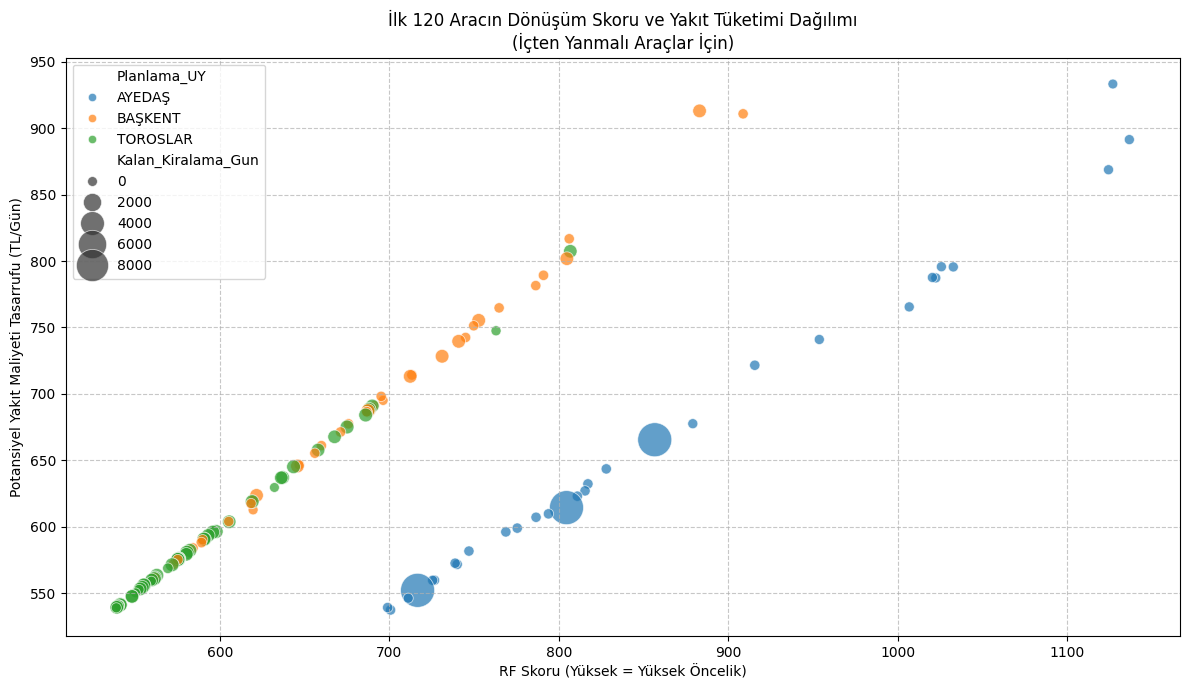

In [ ]:
import pandas as pd
import numpy as np
import datetime
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore") # Suppress warnings for cleaner output
import matplotlib.pyplot as plt
import seaborn as sns

# --- Dictionaries for Regional Coefficients and Electrical Infrastructure Score ---
# IMPORTANT: These dictionaries are now intended to map to the 'Bolge' column (originally 'ALT_BÖLGE_1')
regional_coefficients = {
    'BARTIN': 1.00, 'BAŞKENT KULE': 0.50, 'BEYPAZARI': 0.50, 'BOĞAZ': 0.50,
    'CEYHAN': 0.50, 'CİDE OM': 0.50, 'DEVREK': 0.75, 'DÖRTYOL': 0.75,
    'DÜZİÇİ': 0.50, 'ERDEMLİ': 0.50, 'GÖLBAŞI': 0.50, 'K.EREĞLİ': 0.50,
    'KADİRLİ': 0.50, 'KARABÜK': 1.00, 'KARADENİZ': 0.50, 'KASTAMONU': 0.50,
    'KAZAN': 0.50, 'KIRIKHAN': 0.50, 'KIRIKKALE': 1.00, 'KIRIKKALE AOB': 1.00,
    'KIRIKKALE OM': 1.00, 'KIZILAY': 0.50, 'KIZILCAHAMAM': 0.50, 'KOZAN': 0.50,
    'KURŞUNLU': 0.50, 'MARMARA': 0.50, 'MERKEZ-MERSİN': 0.75, 'NİĞDE': 0.50,
    'OSMANİYE': 0.50, 'POLATLI': 0.50, 'POZANTI': 0.50, 'SAİMBEYLİ': 0.50,
    'SİNCAN': 0.50, 'SULAK': 0.50, 'ŞABANÖZÜ AOB': 0.50, 'ŞEHİTKAMİL': 0.50,
    'ŞEREFLİKOÇHİSAR': 0.50, 'ADANA GM': 0.50, 'ADANA BM': 0.50, 'MERSİN': 0.75,
    'GAZİANTEP': 0.50, 'HATAY LHM': 0.75, 'TARSUS': 0.50, 'ANAMUR': 0.50,
    'OSMANİYE AOB': 0.75, 'HATAY FİLO OPR MÜDÜRLÜĞÜ': 0.75, 'KOZAN OM': 0.50,
    'KİLİS OM': 0.50, 'İSKENDERUN OM': 0.75, 'AYEDAŞ GM': 0.50,
    'AYEDAŞ GM (AÇIK OTOPARK)': 0.50, 'MALTEPE': 0.50, 'KADIKÖY': 0.50,
    'ÜMRANİYE': 0.50, 'PENDİK': 0.50, 'ÇEKMEKÖY': 0.50, 'KARTAL': 0.50,
    'SULTANBEYLİ': 0.50, 'SANCAKTEPE': 0.50, 'KAYIŞDAĞI': 0.50, 'ARNAVUTKÖY': 0.50,
    'BAKIRKÖY': 0.50, 'BÜYÜKÇEKMECE': 0.50, 'ÇATALCA': 0.50, 'EYÜPSULTAN': 0.50,
    'FATİH': 0.50, 'ESENLER': 0.50, 'AVCILAR': 0.50, 'BEYLİKDÜZÜ': 0.50,
    'BEYOĞLU': 0.50, 'GÜNGÖREN': 0.50, 'SİLİVRİ': 0.50, 'ŞİŞLİ': 0.50,
    'ZEYTİNBURNU': 0.50, 'VANİKÖY': 0.50, 'GEBZE': 0.50, 'ÇAYIROVA': 0.50,
    'DİLOVASI': 0.50, 'DÜZCE': 0.50, 'BOLU': 0.50, 'ESKİŞEHİR': 0.50,
    'KÜTAHYA': 0.50, 'BİLECİK': 0.50, 'BOSNA': 0.50, 'ÇAYIRHAN': 0.50,
    'GÖLBAŞI': 0.50, 'NİĞDE AOB': 0.50, 'NEVŞEHİR': 0.50,
    'KAYSERİ': 0.50, 'KİLİS İŞLETME/AOB': 0.50
}

elektrik_altyapi_skoru = {
    'BOĞAZ': 0.92, 'KARADENİZ': 0.92, 'ÜSKÜDAR': 0.92, 'BAŞKENT KULE': 0.92,
    'TOK SOKAK': 0.92, 'TOK SOKAK SCADA': 0.92, 'ÇANKIRI OM': 0.94, 'KIRIKKALE': 0.94,
    'KIRIKKALE AOB': 0.94, 'KIRIKKALE OM': 0.94, 'BARTIN': 0.86, 'BEYPAZARI': 0.86,
    'SİNCAN': 0.86, 'POLATLI': 0.86, 'SEYHAN': 0.84, 'YÜREĞİR': 0.84,
    'ŞEHİTKAMİL': 0.84, 'KARABÜK': 0.80, 'MERKEZ-MERSİN': 0.78, 'K.EREĞLİ': 0.78,
    'CEYHAN': 0.78, 'DÖRTYOL': 0.78, 'OSMANİYE': 0.78, 'KIZILAY': 0.78,
    'KIZILCAHAMAM': 0.78, 'KOZAN': 0.78, 'KADİRLİ': 0.78, 'SULAK': 0.78,
    'ADANA GM': 0.84, 'ADANA BM': 0.84, 'MERSİN': 0.78, 'GAZİANTEP': 0.84,
    'HATAY LHM': 0.78, 'TARSUS': 0.78, 'ANAMUR': 0.78, 'OSMANİYE AOB': 0.78,
    'HATAY FİLO OPR MÜDÜRLÜĞÜ': 0.78, 'KOZAN OM': 0.78, 'KİLİS OM': 0.78,
    'İSKENDERUN OM': 0.78, 'AYEDAŞ GM': 0.92, 'AYEDAŞ GM (AÇIK OTOPARK)': 0.92,
    'MALTEPE': 0.92, 'KADIKÖY': 0.92, 'ÜMRANİYE': 0.92, 'PENDİK': 0.92,
    'ÇEKMEKÖY': 0.92, 'KARTAL': 0.92, 'SULTANBEYLİ': 0.92, 'SANCAKTEPE': 0.92,
    'KAYIŞDAĞI': 0.92, 'ARNAVUTKÖY': 0.92, 'BAKIRKÖY': 0.92, 'BÜYÜKÇEKMECE': 0.92,
    'ÇATALCA': 0.92, 'EYÜPSULTAN': 0.92, 'FATİH': 0.92, 'ESENLER': 0.92,
    'AVCILAR': 0.92, 'BEYLİKDÜZÜ': 0.92, 'BEYOĞLU': 0.92, 'GÜNGÖREN': 0.92,
    'SİLİVRİ': 0.92, 'ŞİŞLİ': 0.92, 'ZEYTİNBURNU': 0.92, 'VANİKÖY': 0.92,
    'GEBZE': 0.88, 'ÇAYIROVA': 0.88, 'DİLOVASI': 0.88, 'DÜZCE': 0.88,
    'BOLU': 0.88, 'ESKİŞEHİR': 0.88, 'KÜTAHYA': 0.88, 'BİLECİK': 0.88,
    'BOSNA': 0.88, 'ÇAYIRHAN': 0.88, 'GÖLBAŞI': 0.88, 'NİĞDE AOB': 0.78,
    'NEVŞEHİR': 0.78, 'KAYSERİ': 0.78, 'KİLİS İŞLETME/AOB': 0.78
}

# --- 1. Load and Clean Data ---
file_name = "elektric_new.csv"
try:
    df = pd.read_csv(file_name, index_col=0)
except FileNotFoundError:
    print(f"Error: '{file_name}' not found. Please ensure the file is in the correct directory.")
    exit()

def clean_columns(df_input):
    cleaned_columns = (
        df_input.columns.str.strip().str.replace(" ", "_", regex=False)
        .str.replace("(", "", regex=False).str.replace(")", "", regex=False)
        .str.replace(".", "", regex=False).str.replace("-", "_", regex=False)
        .str.replace(":", "_", regex=False)
    )
    return cleaned_columns

df.columns = clean_columns(df)

rename_mapping = {
    'Motor_türü': 'Motor_Turu', 'Planlama_ÜY': 'Planlama_UY', 'İlk_6_Ay_Total_Km': 'Toplam_6_Ay_KM',
    'İlk_6_Ay_YakıtLT': 'Toplam_6_Ay_Yakıt_LT', 'SÜREÇ_METNİ': 'Kullanim_Gorevi',
    'ALT_BÖLGE_1': 'Bolge', 'ALT_BÖLGE_2': 'Alt_Bolge_2', 'KİRA_BİTİŞ_TARİHİ': 'Kira_Bitis_Tarihi',
    'Taşıt_türü': 'Tasit_Turu', 'istasyon': 'Bolge_Sarj_Istasyon_Sayisi_FromFile'
}

existing_columns_to_rename = {old_name: new_name for old_name, new_name in rename_mapping.items() if old_name in df.columns}
df = df.rename(columns=existing_columns_to_rename)

required_cols = ['PLAKA', 'Motor_Turu', 'Planlama_UY', 'Toplam_6_Ay_KM', 'Toplam_6_Ay_Yakıt_LT',
                 'Kullanim_Gorevi', 'Bolge', 'Alt_Bolge_2', 'Kira_Bitis_Tarihi', 'Tasit_Turu']

if 'Bolge_Sarj_Istasyon_Sayisi_FromFile' in df.columns:
    required_cols.append('Bolge_Sarj_Istasyon_Sayisi_FromFile')
else:
    print("\nWarning: 'istasyon' column not found in the file.")

for col_check in ['Bolge', 'Alt_Bolge_2', 'Planlama_UY']:
    if col_check not in df.columns:
        df[col_check] = np.nan

missing_cols_final_check = [col for col in required_cols if col not in df.columns]
if missing_cols_final_check:
    print(f"\nERROR: The following required columns are missing: {missing_cols_final_check}")
    print("Current DataFrame columns:", df.columns.tolist())
    exit()

df_filtered = df[required_cols].copy()
df_filtered['Toplam_6_Ay_KM'] = pd.to_numeric(df_filtered['Toplam_6_Ay_KM'], errors='coerce').fillna(0)
df_filtered['Toplam_6_Ay_Yakıt_LT'] = pd.to_numeric(df_filtered['Toplam_6_Ay_Yakıt_LT'], errors='coerce').fillna(0)

for col in ['Motor_Turu', 'Kullanim_Gorevi', 'Bolge', 'Tasit_Turu', 'Alt_Bolge_2', 'Planlama_UY']:
    df_filtered[col] = df_filtered[col].fillna('Bilinmiyor').astype(str).str.strip().str.upper().str.replace(r'\s+', ' ', regex=True)

current_date = pd.to_datetime(datetime.date(2025, 7, 30))
df_filtered['Kira_Bitis_Tarihi'] = pd.to_datetime(df_filtered['Kira_Bitis_Tarihi'], errors='coerce')
df_filtered['Kira_Bitis_Tarihi'] = df_filtered['Kira_Bitis_Tarihi'].fillna(current_date + pd.DateOffset(years=10))
df_filtered['Kalan_Kiralama_Gun'] = (df_filtered['Kira_Bitis_Tarihi'] - current_date).dt.days.clip(lower=0)

# --- 2. Feature Engineering and Dictionary Integration ---
elektrikli_counts = df_filtered[df_filtered['Motor_Turu'].str.contains("ELEKTRİKLİ", case=False, na=False)]
elektrikli_by_bolge = elektrikli_counts['Bolge'].value_counts().reset_index()
elektrikli_by_bolge.columns = ['Bolge', 'Bolge_Elektrikli_Arac_Sayisi']
df_filtered = df_filtered.merge(elektrikli_by_bolge, on='Bolge', how='left')
df_filtered['Bolge_Elektrikli_Arac_Sayisi'] = df_filtered['Bolge_Elektrikli_Arac_Sayisi'].fillna(0).astype(int)

df_filtered['Is_Panelvan_Ariza_Onarim'] = (
    (df_filtered['Tasit_Turu'].str.contains("PANLVAN", case=False, na=False)) &
    (df_filtered['Kullanim_Gorevi'].str.contains("ARIZA ONARIM", case=False, na=False))
).astype(int)

df_filtered['Dogal_Afet_Risk_Orani'] = df_filtered['Bolge'].map(regional_coefficients).fillna(0.50)
df_filtered['Bolge_Elektrik_Altyapi_Skoru'] = df_filtered['Bolge'].map(elektrik_altyapi_skoru).fillna(0.50)

# Planlama_UY öncelik katsayısı oluşturuluyor
planlama_uy_oncelik_katsayisi = {
    'AYEDAŞ': 1.3,
    'TOROSLAR': 1,
    'BAŞKENT': 1,
    'BİLİNMİYOR': 1.0,
    'OTHER': 1.0
}
df_filtered['Planlama_UY_Katsayisi'] = df_filtered['Planlama_UY'].map(planlama_uy_oncelik_katsayisi).fillna(1.0)

df_filtered['Ortalama_Gunluk_KM'] = df_filtered['Toplam_6_Ay_KM'] / 120
df_filtered['LT/100km'] = (df_filtered['Toplam_6_Ay_Yakıt_LT'] / df_filtered['Toplam_6_Ay_KM'])*100
yakit_litre_fiyat = 50
df_filtered['Potansiyel_Maliyet_Tasarrufu'] = df_filtered['LT/100km'] * yakit_litre_fiyat
df_filtered.loc[df_filtered['Motor_Turu'].str.contains("ELEKTRİKLİ", case=False, na=False), 'Potansiyel_Maliyet_Tasarrufu'] = 0

df_filtered['Ağırlıklı_Tasarruf'] = df_filtered['Potansiyel_Maliyet_Tasarrufu'] * df_filtered['Planlama_UY_Katsayisi']
df_filtered['Log_Tasarruf'] = np.log1p(df_filtered['Ağırlıklı_Tasarruf'])


# --- 3. Categorical Simplification and One-Hot Encoding ---
def top_n_categories(df, col, n=3):
    if col not in df.columns or df[col].isnull().all():
        return df[col]
    temp_series = df[col][df[col] != 'BİLİNMİYOR']
    if temp_series.empty:
        return df[col]
    top = temp_series.value_counts().nlargest(n).index.tolist()
    return df[col].apply(lambda x: x if x in top or x == 'BİLİNMİYOR' else 'OTHER')

df_filtered['Motor_Turu'] = top_n_categories(df_filtered, 'Motor_Turu')
df_filtered['Kullanim_Gorevi'] = top_n_categories(df_filtered, 'Kullanim_Gorevi')
cols_to_onehot = [col for col in ['Motor_Turu', 'Kullanim_Gorevi', 'Bolge', 'Planlama_UY'] if col in df_filtered.columns]
df_encoded = pd.get_dummies(df_filtered, columns=cols_to_onehot, drop_first=True, dtype=int)


# --- 4. Score Calculation (RandomForest Model) ---
non_electric_indices_filtered = df_filtered[~df_filtered['Motor_Turu'].str.contains("ELEKTRİKLİ", case=False, na=False)].index

base_feature_cols = ['Ortalama_Gunluk_KM', 'LT/100km', 'Kalan_Kiralama_Gun',
                     'Bolge_Elektrikli_Arac_Sayisi', 'Bolge_Elektrik_Altyapi_Skoru',
                     'Dogal_Afet_Risk_Orani', 'Is_Panelvan_Ariza_Onarim']
one_hot_feature_cols = [col for col in df_encoded.columns if any(col.startswith(prefix) for prefix in ['Motor_Turu_', 'Kullanim_Gorevi_', 'Bolge_', 'Planlama_UY_'])]
feature_cols = [col for col in (base_feature_cols + one_hot_feature_cols) if col in df_encoded.columns]

X_train = df_encoded.loc[non_electric_indices_filtered, feature_cols].copy()
y_train = df_encoded.loc[non_electric_indices_filtered, 'Log_Tasarruf'].copy()

if X_train.isnull().sum().sum() > 0 or not np.isfinite(X_train).all().all():
    numeric_cols_in_X_train = X_train.select_dtypes(include=np.number).columns
    X_train.loc[:, numeric_cols_in_X_train] = X_train.loc[:, numeric_cols_in_X_train].replace([np.inf, -np.inf], np.nan).fillna(X_train[numeric_cols_in_X_train].mean())
if y_train.isnull().sum().sum() > 0 or not np.isfinite(y_train).all().all():
    y_train = y_train.replace([np.inf, -np.inf], np.nan).fillna(y_train.mean())

if X_train.empty or y_train.empty or len(X_train) != len(y_train):
    raise ValueError("Insufficient or inconsistent data for model training.")

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

X_predict = df_encoded[feature_cols].copy()
if X_predict.isnull().sum().sum() > 0 or not np.isfinite(X_predict).all().all():
    numeric_cols_in_X_predict = X_predict.select_dtypes(include=np.number).columns
    for col in numeric_cols_in_X_predict:
        if col in X_train.columns and not X_train[col].empty:
            fill_value = X_train[col].mean()
        else:
            fill_value = X_predict[col].mean() if not X_predict[col].empty else 0
        X_predict.loc[:, col] = X_predict.loc[:, col].replace([np.inf, -np.inf], np.nan).fillna(fill_value)

df_encoded['RF_Score'] = 0.0
if not non_electric_indices_filtered.empty and not X_predict.loc[non_electric_indices_filtered].empty:
    predicted_log_tasarruf = model.predict(X_predict.loc[non_electric_indices_filtered])
    predicted_tasarruf = np.expm1(predicted_log_tasarruf)
    df_encoded.loc[non_electric_indices_filtered, 'RF_Score'] = predicted_tasarruf

# Orijinal sütunları RF skoru ile birleştir
df_final = df_encoded.merge(
    df_filtered[['PLAKA', 'Motor_Turu', 'Planlama_UY', 'Kullanim_Gorevi', 'Bolge', 'Alt_Bolge_2', 'Tasit_Turu']],
    on='PLAKA',
    how='left',
)
df_final['Potansiyel_Maliyet_Tasarrufu'] = df_final['Potansiyel_Maliyet_Tasarrufu'].fillna(0)


# --- 5. BÖLGESEL KOTALARA GÖRE LİSTE OLUŞTURMA ---
total_vehicles_to_convert = 120


ayedas_quota = int(total_vehicles_to_convert * 0.25)
if ayedas_quota < 10:
    ayedas_quota = 10

other_regions_df = df_final[df_final['Planlama_UY'].isin(['BAŞKENT', 'TOROSLAR'])]
total_other_non_electric = len(other_regions_df)

baskent_non_electric_count = len(other_regions_df[other_regions_df['Planlama_UY'] == 'BAŞKENT'])
toroslar_non_electric_count = len(other_regions_df[other_regions_df['Planlama_UY'] == 'TOROSLAR'])

remaining_quota = total_vehicles_to_convert - ayedas_quota

if total_other_non_electric > 0:
    baskent_quota = int(remaining_quota * (baskent_non_electric_count / total_other_non_electric))
    toroslar_quota = remaining_quota - baskent_quota
else:
    baskent_quota = remaining_quota // 2
    toroslar_quota = remaining_quota - baskent_quota

print(f"\n--- Bölgesel Kotalar ---")
print(f"AYEDAŞ: {ayedas_quota} araç (garantili)")
print(f"BAŞKENT: {baskent_quota} araç (orantılı)")
print(f"TOROSLAR: {toroslar_quota} araç (orantılı)")


ayedas_df = df_final[df_final['Planlama_UY'] == 'AYEDAŞ'].sort_values(by='RF_Score', ascending=False)
baskent_df = df_final[df_final['Planlama_UY'] == 'BAŞKENT'].sort_values(by='RF_Score', ascending=False)
toroslar_df = df_final[df_final['Planlama_UY'] == 'TOROSLAR'].sort_values(by='RF_Score', ascending=False)

top_ayedas = ayedas_df.head(ayedas_quota)
top_baskent = baskent_df.head(baskent_quota)
top_toroslar = toroslar_df.head(toroslar_quota)

final_recommendation_list = pd.concat([top_ayedas, top_baskent, top_toroslar])
final_recommendation_list = final_recommendation_list.sort_values(by='RF_Score', ascending=False)

print(f"\n--- Dönüşüm İçin En Yüksek Önceliğe Sahip İlk {total_vehicles_to_convert} Aracın Dağılımı ---")
uy_distribution = final_recommendation_list['Planlama_UY'].value_counts()
print(uy_distribution)
print(f"\nAYEDAŞ Oranı: {uy_distribution.get('AYEDAŞ', 0) / total_vehicles_to_convert * 100:.2f}%")

output_cols = ['PLAKA', 'Motor_Turu', 'Planlama_UY', 'Kullanim_Gorevi', 'Bolge', 'Alt_Bolge_2',
               'Bolge_Elektrikli_Arac_Sayisi', 'Bolge_Elektrik_Altyapi_Skoru', 'Dogal_Afet_Risk_Orani',
               'RF_Score', 'Ortalama_Gunluk_KM', 'LT/100km', 'Kalan_Kiralama_Gun',
               'Is_Panelvan_Ariza_Onarim', 'Potansiyel_Maliyet_Tasarrufu', 'Log_Tasarruf']

output_cols = [col for col in output_cols if col in final_recommendation_list.columns]
final_recommendation_list[output_cols].to_csv("elektrikli_arac_donusum_listesi_120_arac.csv", index=False)
print(f"\n✅ Dönüşüm için 120 araçlık liste oluşturuldu ve 'elektrikli_arac_donusum_listesi_120_arac.csv' dosyasına kaydedildi.")

df_plot = final_recommendation_list[final_recommendation_list['Motor_Turu'].str.contains("ELEKTRİKLİ", case=False, na=False) == False].copy()

if not df_plot.empty:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x='RF_Score', y='Potansiyel_Maliyet_Tasarrufu', data=df_plot,
                    hue='Planlama_UY', size='Kalan_Kiralama_Gun', sizes=(50, 600), alpha=0.7)
    plt.title(f'İlk {total_vehicles_to_convert} Aracın Dönüşüm Skoru ve Yakıt Tüketimi Dağılımı\n(İçten Yanmalı Araçlar İçin)')
    plt.xlabel('RF Skoru (Yüksek = Yüksek Öncelik)')
    plt.ylabel('Potansiyel Yakıt Maliyeti Tasarrufu (TL/Gün)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('donusum_skor_dagilimi_120_arac.png')
    plt.show()
else:
    print("\nGrafik çizmek için elektrikli olmayan araç verisi bulunamadı.")

In [ ]:
score = pd.read_csv("elektrikli_arac_donusum_listesi_120_arac.csv")
score.head()

,PLAKA,Motor_Turu,Planlama_UY,Kullanim_Gorevi,Bolge,Bolge_Elektrikli_Arac_Sayisi,Bolge_Elektrik_Altyapi_Skoru,Dogal_Afet_Risk_Orani,RF_Score,Ortalama_Gunluk_KM,LT/100km,Kalan_Kiralama_Gun,Is_Panelvan_Ariza_Onarim,Potansiyel_Maliyet_Tasarrufu,Log_Tasarruf
0,PLK927,DİZEL,AYEDAŞ,OTHER,BOĞAZ,13,0.92,0.5,1136.606117,24.341667,17.828483,42,1,891.424170,7.056047
1,PLK1008,DİZEL,AYEDAŞ,OTHER,KARADENİZ,32,0.92,0.5,1126.876183,39.041667,18.665742,0,0,933.287086,7.101901
2,PLK962,DİZEL,AYEDAŞ,OTHER,MARMARA,23,0.50,0.5,1124.310186,25.458333,17.374795,42,1,868.739771,7.030293
3,PLK920,DİZEL,AYEDAŞ,OTHER,BOĞAZ,13,0.92,0.5,1032.741058,50.400000,15.911376,42,1,795.568783,6.942388
4,PLK925,DİZEL,AYEDAŞ,OTHER,MARMARA,23,0.50,0.5,1025.710713,52.050000,15.914345,42,1,795.717259,6.942574


In [ ]:
score.sort_values(by="RF_Score",ascending = False).head(120)

,PLAKA,Motor_Turu,Planlama_UY,Kullanim_Gorevi,Bolge,Bolge_Elektrikli_Arac_Sayisi,Bolge_Elektrik_Altyapi_Skoru,Dogal_Afet_Risk_Orani,RF_Score,Ortalama_Gunluk_KM,LT/100km,Kalan_Kiralama_Gun,Is_Panelvan_Ariza_Onarim,Potansiyel_Maliyet_Tasarrufu,Log_Tasarruf
0,PLK927,DİZEL,AYEDAŞ,OTHER,BOĞAZ,13,0.92,0.50,1136.606117,24.341667,17.828483,42,1,891.424170,7.056047
1,PLK1008,DİZEL,AYEDAŞ,OTHER,KARADENİZ,32,0.92,0.50,1126.876183,39.041667,18.665742,0,0,933.287086,7.101901
2,PLK962,DİZEL,AYEDAŞ,OTHER,MARMARA,23,0.50,0.50,1124.310186,25.458333,17.374795,42,1,868.739771,7.030293
3,PLK920,DİZEL,AYEDAŞ,OTHER,BOĞAZ,13,0.92,0.50,1032.741058,50.400000,15.911376,42,1,795.568783,6.942388
4,PLK925,DİZEL,AYEDAŞ,OTHER,MARMARA,23,0.50,0.50,1025.710713,52.050000,15.914345,42,1,795.717259,6.942574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,PLK1006,DİZEL,TOROSLAR,OTHER,YÜREĞİR,26,0.84,0.50,540.827066,75.100000,10.821682,0,0,541.084110,6.295421
116,PLK493,DİZEL,TOROSLAR,ENDEKS OKUMA,MERKEZ - KİLİS,2,0.50,0.50,540.696886,101.648917,10.813117,132,0,540.655869,6.294631
117,PLK213,BENZİNLİ,TOROSLAR,OTHER,ŞEHİTKAMİL,24,0.84,0.50,539.703266,92.515833,10.798332,732,0,539.916591,6.293265
118,PLK249,BENZİNLİ,TOROSLAR,OTHER,MERKEZ-MERSİN,15,0.78,0.75,539.156404,85.975000,10.785306,732,0,539.265290,6.292060


In [ ]:
score["Planlama_UY"].value_counts()

,count
Planlama_UY,
TOROSLAR,51
BAŞKENT,39
AYEDAŞ,30


In [ ]:
score["Bolge"].value_counts()

,count
Bolge,
TOK SOKAK,27
YÜREĞİR,19
BOĞAZ,11
MERKEZ-MERSİN,9
MARMARA,8
KARADENİZ,7
ŞEHİTKAMİL,7
SİNCAN,4
MALTEPE GENEL MÜDÜRLÜK,4


In [ ]:
score[["Ortalama_Gunluk_KM", "LT/100km"]].sort_values("Ortalama_Gunluk_KM", ascending=False)

,Ortalama_Gunluk_KM,LT/100km
119,155.908333,10.778449
42,152.016667,14.263732
43,142.258333,10.923145
95,139.208333,11.437653
72,128.066667,12.393480
...,...,...
7,28.966667,15.309551
63,28.033333,13.105826
2,25.458333,17.374795
0,24.341667,17.828483


In [ ]:
score.head()

,PLAKA,Motor_Turu,Planlama_UY,Kullanim_Gorevi,Bolge,Bolge_Elektrikli_Arac_Sayisi,Bolge_Elektrik_Altyapi_Skoru,Dogal_Afet_Risk_Orani,RF_Score,Ortalama_Gunluk_KM,LT/100km,Kalan_Kiralama_Gun,Is_Panelvan_Ariza_Onarim,Potansiyel_Maliyet_Tasarrufu,Log_Tasarruf
0,PLK927,DİZEL,AYEDAŞ,OTHER,BOĞAZ,13,0.92,0.5,1136.606117,24.341667,17.828483,42,1,891.424170,7.056047
1,PLK1008,DİZEL,AYEDAŞ,OTHER,KARADENİZ,32,0.92,0.5,1126.876183,39.041667,18.665742,0,0,933.287086,7.101901
2,PLK962,DİZEL,AYEDAŞ,OTHER,MARMARA,23,0.50,0.5,1124.310186,25.458333,17.374795,42,1,868.739771,7.030293
3,PLK920,DİZEL,AYEDAŞ,OTHER,BOĞAZ,13,0.92,0.5,1032.741058,50.400000,15.911376,42,1,795.568783,6.942388
4,PLK925,DİZEL,AYEDAŞ,OTHER,MARMARA,23,0.50,0.5,1025.710713,52.050000,15.914345,42,1,795.717259,6.942574


In [ ]:
score.to_csv("Son_120_Araç.csv")

In [ ]:
bolge = score["Planlama_UY"].value_counts()
bolge

,count
Planlama_UY,
TOROSLAR,51
BAŞKENT,39
AYEDAŞ,30


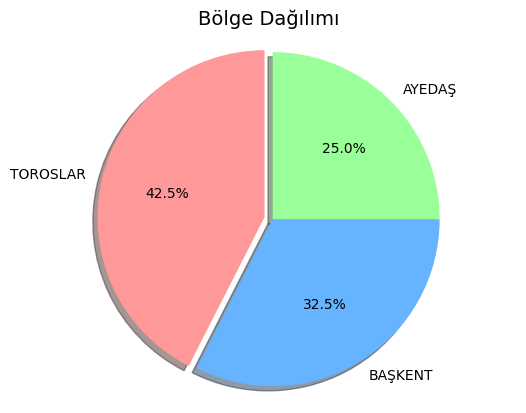

In [ ]:
import matplotlib.pyplot as plt

labels = ['TOROSLAR', 'BAŞKENT', 'AYEDAŞ']
sizes = [51, 39, 30]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.05, 0, 0)


fig1, ax1 = plt.subplots()

ax1.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)


ax1.axis('equal')

plt.title('Bölge Dağılımı', fontsize=14)
plt.savefig('Bölge Dağılımı.png')

plt.show()

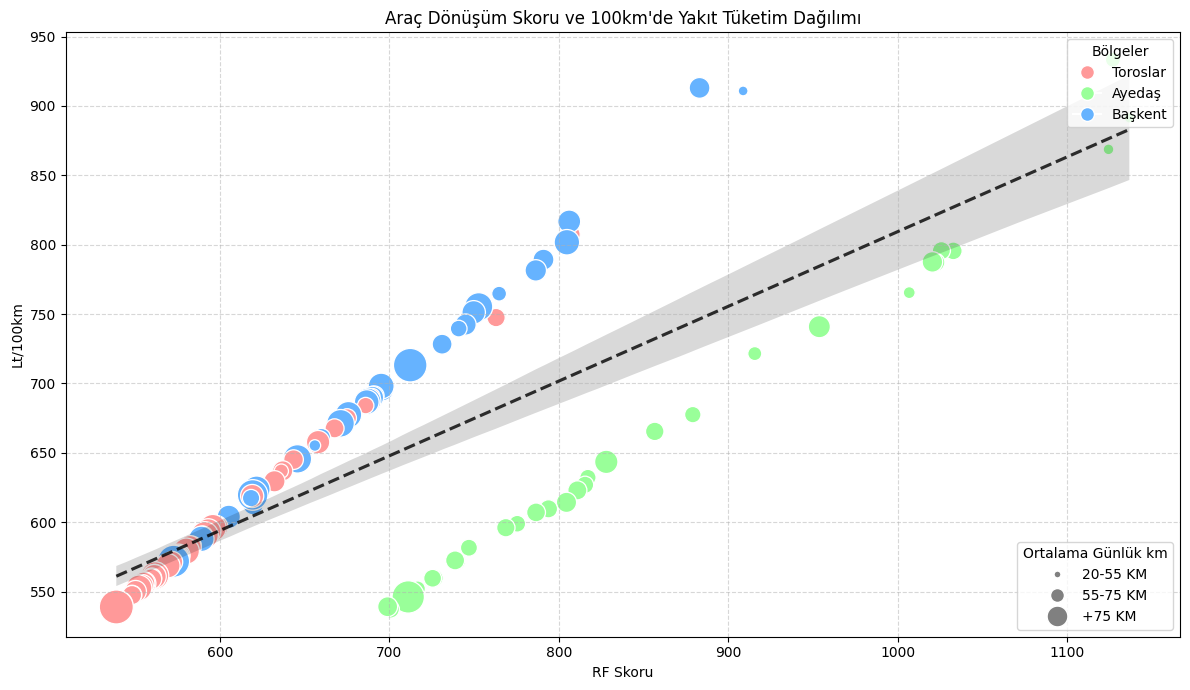

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 7))
palette = {'TOROSLAR': '#ff9999', 'AYEDAŞ': '#99ff99', 'BAŞKENT': '#66b3ff'}
sns.scatterplot(x='RF_Score', y='Potansiyel_Maliyet_Tasarrufu', data=score,
                    hue='Planlama_UY', size="Ortalama_Gunluk_KM", sizes=(50, 600), alpha=1, palette=palette)
sns.regplot(x='RF_Score', y='Potansiyel_Maliyet_Tasarrufu', data=score,
            scatter=False, color='black', line_kws={'linestyle':'--', 'alpha':0.8})

plt.title("Araç Dönüşüm Skoru ve 100km'de Yakıt Tüketim Dağılımı")

plt.xlabel('RF Skoru')
plt.ylabel("Lt/100km")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend([], [], frameon=False)
palette = {'Toroslar': '#ff9999', 'Ayedaş': '#99ff99', 'Başkent': '#66b3ff'}

legend_elements_hue = [
    plt.Line2D([0], [0], marker='o', color='w', label='Toroslar',
               markerfacecolor=palette['Toroslar'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Ayedaş',
               markerfacecolor=palette['Ayedaş'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Başkent',
               markerfacecolor=palette['Başkent'], markersize=10)
]
legend_elements_size = [
    plt.Line2D([0], [0], marker='o', color='w', label='20-55 KM',
               markerfacecolor='gray', markersize=5),
    plt.Line2D([0], [0], marker='o', color='w', label='55-75 KM',
               markerfacecolor='gray', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='+75 KM',
               markerfacecolor='gray', markersize=15)
]
legend1 = plt.legend(handles=legend_elements_hue, loc='upper right', title='Bölgeler')
ax = plt.gca().add_artist(legend1)
plt.legend(handles=legend_elements_size, loc='lower right', title='Ortalama Günlük km')
plt.savefig('Araç Dönüşüm Skoru ve 100km Yakıt Tüketim Dağılımı.png')

plt.show()

In [ ]:
score.head()

,PLAKA,Motor_Turu,Planlama_UY,Kullanim_Gorevi,Bolge,Bolge_Elektrikli_Arac_Sayisi,Bolge_Elektrik_Altyapi_Skoru,Dogal_Afet_Risk_Orani,RF_Score,Ortalama_Gunluk_KM,LT/100km,Kalan_Kiralama_Gun,Is_Panelvan_Ariza_Onarim,Potansiyel_Maliyet_Tasarrufu,Log_Tasarruf
0,PLK927,DİZEL,AYEDAŞ,OTHER,BOĞAZ,13,0.92,0.5,1136.606117,24.341667,17.828483,42,1,891.424170,7.056047
1,PLK1008,DİZEL,AYEDAŞ,OTHER,KARADENİZ,32,0.92,0.5,1126.876183,39.041667,18.665742,0,0,933.287086,7.101901
2,PLK962,DİZEL,AYEDAŞ,OTHER,MARMARA,23,0.50,0.5,1124.310186,25.458333,17.374795,42,1,868.739771,7.030293
3,PLK920,DİZEL,AYEDAŞ,OTHER,BOĞAZ,13,0.92,0.5,1032.741058,50.400000,15.911376,42,1,795.568783,6.942388
4,PLK925,DİZEL,AYEDAŞ,OTHER,MARMARA,23,0.50,0.5,1025.710713,52.050000,15.914345,42,1,795.717259,6.942574


In [ ]:
pd.qcut(score["Ortalama_Gunluk_KM"], 3).value_counts()

,count
Ortalama_Gunluk_KM,
"(23.174, 53.288]",40
"(53.288, 73.652]",40
"(73.652, 155.908]",40
